In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from prophet import Prophet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_R_outliers1.csv')
df.head()

,ds,y
0,2008-01-30,5.976351
1,2008-01-16,6.049733
2,2008-01-17,6.011267
3,2008-01-14,5.953243
4,2008-01-15,5.910797


<Axes: >

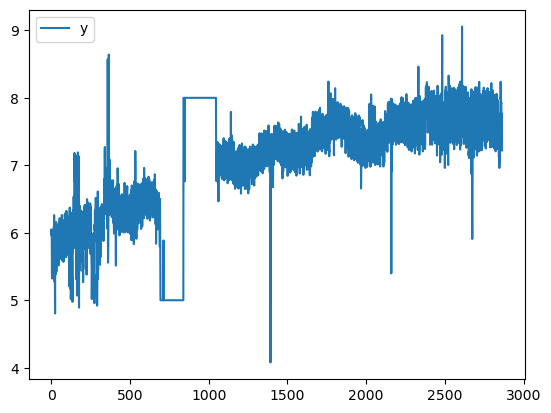

In [3]:

df.plot()

In [4]:
fig = px.line(df, x='ds', y='y', title='wikipdie')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='value')
fig.show()


In [12]:
p = Prophet()
p.fit(df)
future = p.make_future_dataframe(periods=1096)
forecast = p.predict(future)

forecast.head()

15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:09 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,5.824903,5.374782,6.162820,5.824903,5.824903,-0.045574,-0.045574,-0.045574,0.147134,0.147134,0.147134,-0.192708,-0.192708,-0.192708,0.0,0.0,0.0,5.779329
1,2008-01-02,5.825995,5.401675,6.167179,5.825995,5.825995,-0.034090,-0.034090,-0.034090,0.152868,0.152868,0.152868,-0.186959,-0.186959,-0.186959,0.0,0.0,0.0,5.791905
2,2008-01-03,5.827087,5.376653,6.177243,5.827087,5.827087,-0.045135,-0.045135,-0.045135,0.133204,0.133204,0.133204,-0.178339,-0.178339,-0.178339,0.0,0.0,0.0,5.781951
3,2008-01-04,5.828178,5.311578,6.110191,5.828178,5.828178,-0.120602,-0.120602,-0.120602,0.046431,0.046431,0.046431,-0.167033,-0.167033,-0.167033,0.0,0.0,0.0,5.707576
4,2008-01-05,5.829270,4.977609,5.789361,5.829270,5.829270,-0.443864,-0.443864,-0.443864,-0.290587,-0.290587,-0.290587,-0.153277,-0.153277,-0.153277,0.0,0.0,0.0,5.385406


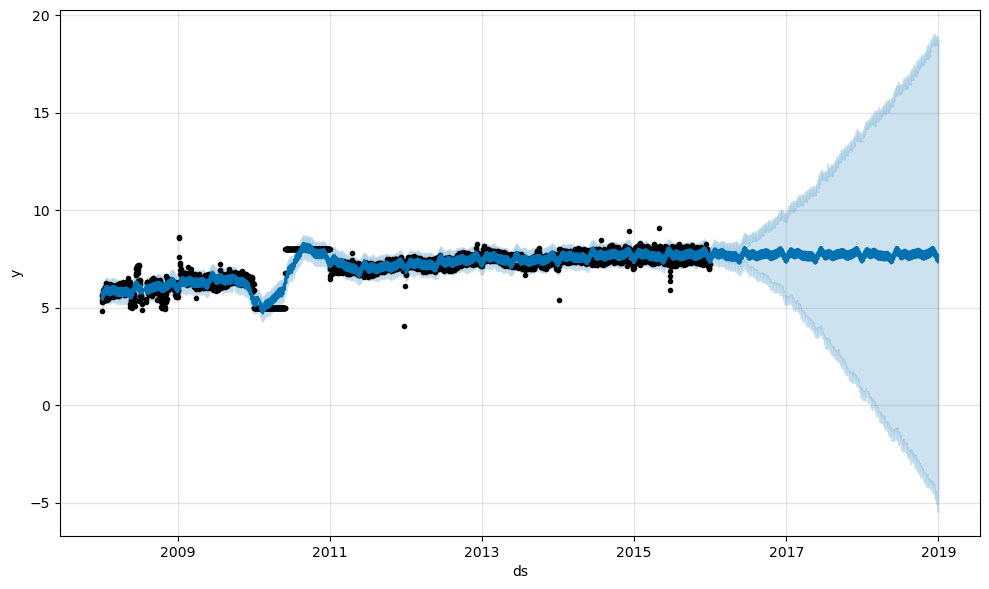

In [14]:
p.plot(forecast);

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:349: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:352: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



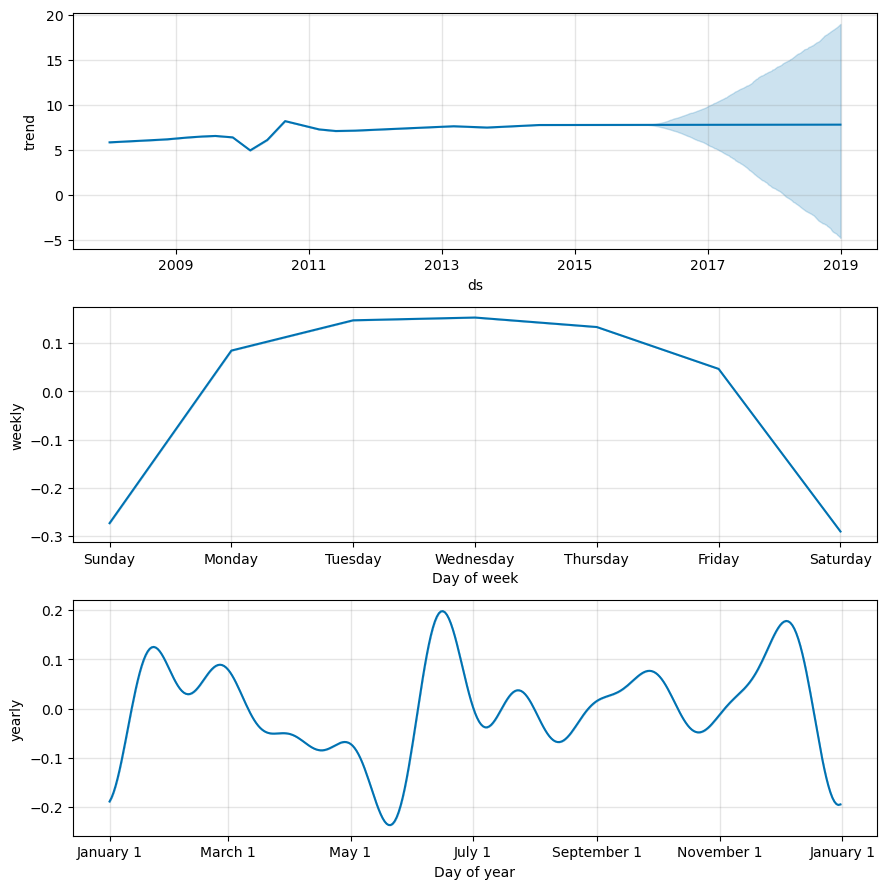

In [15]:
p.plot_components(forecast);

Removing the outliers

In [17]:

df.loc[(df['ds'] > '2010-01-01') & (df['ds'] < '2011-01-01'), 'y'] = None

In [18]:
p = Prophet()
p.fit(df)
future = p.make_future_dataframe(periods=1096)
forecast = p.predict(future)

forecast.head()

15:50:34 - cmdstanpy - INFO - Chain [1] start processing
15:50:35 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2008-01-01,5.705108,5.360601,5.904870,5.705108,5.705108,-0.084528,-0.084528,-0.084528,0.164204,0.164204,0.164204,-0.248733,-0.248733,-0.248733,0.0,0.0,0.0,5.620580
1,2008-01-02,5.706841,5.358363,5.958501,5.706841,5.706841,-0.051802,-0.051802,-0.051802,0.170930,0.170930,0.170930,-0.222732,-0.222732,-0.222732,0.0,0.0,0.0,5.655039
2,2008-01-03,5.708574,5.365583,5.939392,5.708574,5.708574,-0.045024,-0.045024,-0.045024,0.148714,0.148714,0.148714,-0.193738,-0.193738,-0.193738,0.0,0.0,0.0,5.663549
3,2008-01-04,5.710306,5.304703,5.895221,5.710306,5.710306,-0.112677,-0.112677,-0.112677,0.049500,0.049500,0.049500,-0.162177,-0.162177,-0.162177,0.0,0.0,0.0,5.597630
4,2008-01-05,5.712039,4.973094,5.534571,5.712039,5.712039,-0.453664,-0.453664,-0.453664,-0.325143,-0.325143,-0.325143,-0.128521,-0.128521,-0.128521,0.0,0.0,0.0,5.258375


c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:71: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



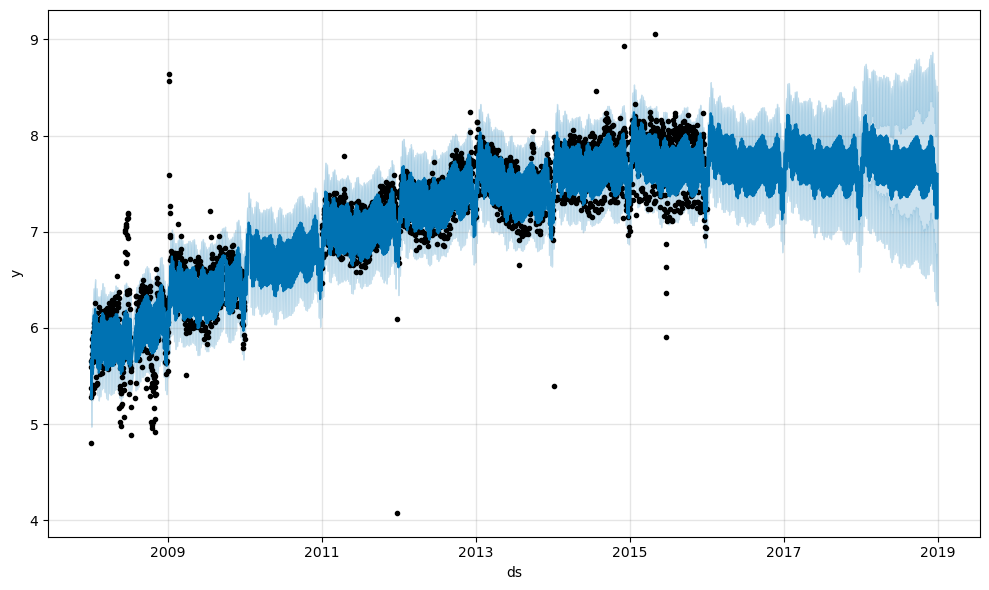

In [19]:
p.plot(forecast);

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:226: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:349: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\akash\miniconda3\envs\mlv2\lib\site-packages\prophet\plot.py:352: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



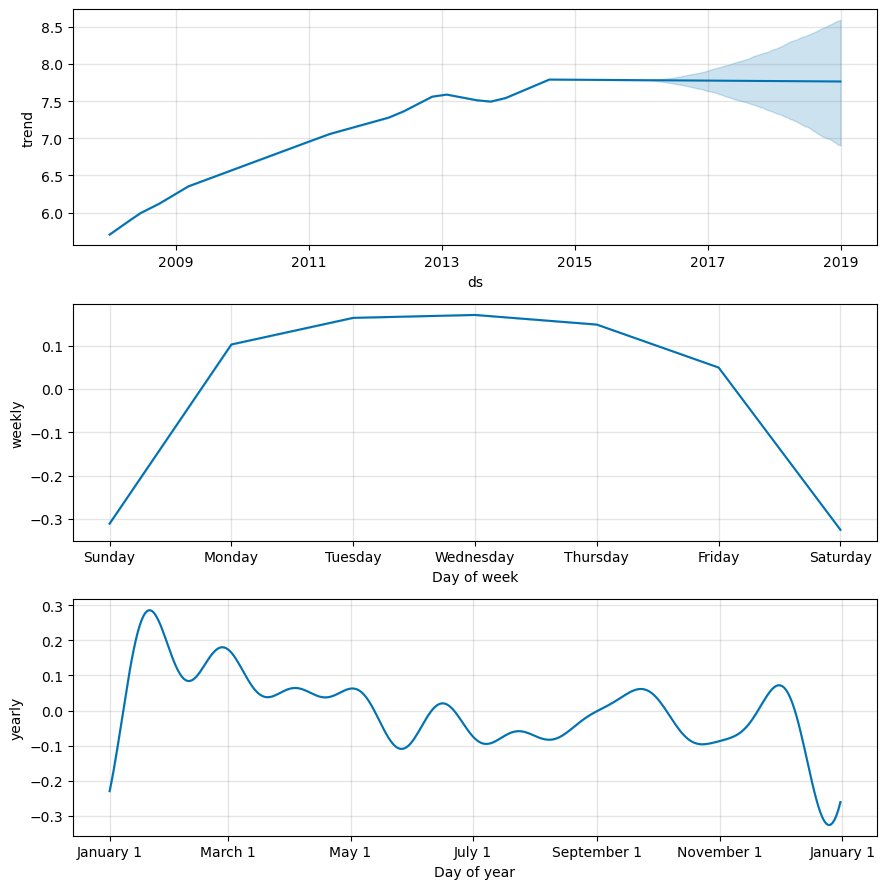

In [21]:
p.plot_components(forecast);